In [1]:
import pandas as pd

ITR = pd.read_csv('금리.csv')
#ITR : Interest rate의 약자 : 금리

STK = pd.read_csv('주가.csv')
#STK는 STOCK의 약자 : 주가

HSP = pd.read_csv('주택.csv')
#HSP는 House price의 약자 : 주택가격

In [2]:
print(ITR.head())
print('--------------------------------------------------------------------------------')
print(STK.head())
print('--------------------------------------------------------------------------------')
print(HSP.head())

           변환    원자료
0  1995-01-04  11.63
1  1995-01-05  10.61
2  1995-01-06   9.28
3  1995-01-07  10.78
4  1995-01-09  12.06
--------------------------------------------------------------------------------
           변환     원자료
0  1995-01-04  997.01
1  1995-01-05  976.06
2  1995-01-06  975.32
3  1995-01-07   988.8
4  1995-01-09  998.32
--------------------------------------------------------------------------------
           변환     원자료
0  1986-01-01  34.656
1  1986-02-01  34.656
2  1986-03-01  34.708
3  1986-04-01  34.449
4  1986-05-01  34.293


In [3]:
print(ITR.shape)
print(ITR.dtypes)
print('--------------------------------------------------------------------------------')
print(STK.shape)
print(STK.dtypes)
print('--------------------------------------------------------------------------------')
print(HSP.shape)
print(HSP.dtypes)

(6862, 2)
변환      object
원자료    float64
dtype: object
--------------------------------------------------------------------------------
(6862, 2)
변환     object
원자료    object
dtype: object
--------------------------------------------------------------------------------
(430, 2)
변환      object
원자료    float64
dtype: object


In [4]:
ITR.rename(columns={'변환':'날짜',
                    '원자료': '금리'}, inplace=True)
print(ITR.head())
print('--------------------------------------------------------------------------------')
STK.rename(columns={'변환':'날짜2',
                    '원자료': '주가'}, inplace=True)
print(STK.head())
print('--------------------------------------------------------------------------------')
HSP.rename(columns={'변환':'날짜3',
                    '원자료': '주택가격'}, inplace=True)
print(HSP.head())

           날짜     금리
0  1995-01-04  11.63
1  1995-01-05  10.61
2  1995-01-06   9.28
3  1995-01-07  10.78
4  1995-01-09  12.06
--------------------------------------------------------------------------------
          날짜2      주가
0  1995-01-04  997.01
1  1995-01-05  976.06
2  1995-01-06  975.32
3  1995-01-07   988.8
4  1995-01-09  998.32
--------------------------------------------------------------------------------
          날짜3    주택가격
0  1986-01-01  34.656
1  1986-02-01  34.656
2  1986-03-01  34.708
3  1986-04-01  34.449
4  1986-05-01  34.293


In [5]:
#금리, 주가 테이블 병합

ALL = pd.concat([ITR, STK], axis=1)
ALL.drop(['날짜2'], axis=1, inplace=True)
print(ALL)

              날짜      금리        주가
0     1995-01-04  11.630    997.01
1     1995-01-05  10.610    976.06
2     1995-01-06   9.280    975.32
3     1995-01-07  10.780     988.8
4     1995-01-09  12.060    998.32
...          ...     ...       ...
6857  2021-11-19   0.750  2,971.02
6858  2021-11-22   0.760  3,013.25
6859  2021-11-23   0.740  2,997.33
6860  2021-11-24   0.740  2,994.29
6861  2021-11-25   1.015  2,980.27

[6862 rows x 3 columns]


In [6]:
# AVL tree

class TreeNode:
    def __init__(self, val=None, val2=None, left=None, right=None, height=1):
        self.val = val
        self.val2 = val2
        self.left = left
        self.right = right
        self.height = height # 높이를 뜻하는 height 속성 추가 기본값=1
        
    def setData(self, val):
        self.data = val # data 대입
        
    def setData2(self, val):
        self.data2 = val # data2 대입

    def setLeft(self, l):
        self.left = l # left node에 숫자 대입

    def setRight(self, r):
        self.right = r # right node에 숫자 대입

    def getData(self):
        return self.val # data 반환
    
    def getData2(self):
        return self.val2 # data2 반환

    def getLeft(self):
        return self.left # left node 반환

    def getRight(self):
        return self.right # right node 반환

class AVLtree:
    def __init__(self, val, val2):
        self.root = TreeNode(val, val2)
 
    def setRoot(self, node):
        self.root = node

    def getRoot(self):
        return self.root

    def isEmpty(self):
        return self.root == None

    def insert(self, val, val2):
        self.root = self._insert_node(self.root, val, val2)
 
    def _insert_node(self, cur, val, val2):
        if not cur:
            return TreeNode(val, val2)
        elif val < cur.val:
            cur.left = self._insert_node(cur.left, val, val2)
        elif val > cur.val:
            cur.right = self._insert_node(cur.right, val, val2)
 
        cur.height = 1 + max(self._get_height(cur.left),
                             self._get_height(cur.right))
 
        balance = self._get_balance(cur)
        if balance > 1 and val > cur.left.val: # Left-Right case
            cur.left = self._left_rotate(cur.left)
            cur = self._right_rotate(cur)
 
        elif balance > 1 and val < cur.left.val: # Left-Left case
            cur = self._right_rotate(cur)
 
        elif balance < -1 and val > cur.right.val: # Right-Right case
            cur = self._left_rotate(cur)
 
        elif balance < -1 and val < cur.right.val: # Right-Left case
            cur.right = self._right_rotate(cur.right)
            cur = self._left_rotate(cur)
        return cur

    def search(self, key):
        node = self.search1(self.getRoot(), key)
        if node != None:
            return node
        else:
            node0 = TreeNode(None, None)
            return node0


    def search1(self, n, key):
        if n == None:
            return None
        if key == n.getData():
            #print('key와 동일n 찾기 성공')
            return n
        elif key < n.getData():
            #print('left', end='')
            return self.search1(n.getLeft(), key);
        else:
            #print('right', end='')
            return self.search1(n.getRight(), key);
    
    def _find_predecessor(self, cur):
        if cur.right:
            return self._find_predecessor(cur.right)
        else:
            return cur.val
 
    def _left_rotate(self, cur):
        v = cur
        w = cur.right
        t = w.left
        cur = w
        w.left = v
        v.right = t
        v.height = 1 + max(self._get_height(v.left), self._get_height(v.right))
        w.height = 1 + max(self._get_height(w.left), self._get_height(w.right))
        return cur
 
    def _right_rotate(self, cur):
        v = cur
        w = cur.left
        t2 = w.right
        cur = w
        w.right = v
        v.left = t2
        v.height = 1 + max(self._get_height(v.left), self._get_height(v.right))
        w.height = 1 + max(self._get_height(w.left), self._get_height(w.right))
        return cur
 
    def _get_height(self, cur):
        if not cur:
            return 0
        return cur.height
 
    def _get_balance(self, cur):
        if not cur:
            return 0
        return self._get_height(cur.left) - self._get_height(cur.right)
    
#AVL tree 코드 출처 : https://8iggy.tistory.com/111

In [7]:
# ALL과 주택 테이블 병합(주택가격이 월간 지수밖에 안나와 있으므로 일이 달라도 같은 월이면 동일하게 값 대입)

tree_HSP = AVLtree(HSP['날짜3'][0], HSP['주택가격'][0])

for i in range(1, len(HSP)):
    tree_HSP.insert(HSP['날짜3'][i], HSP['주택가격'][i])

get_HSP = []
for i in range(len(ALL)):
    dict_date = ALL['날짜'][i].split(sep='-')
    tmp_date = dict_date[0] + '-' + dict_date[1] + '-01'
    tmp_node = tree_HSP.search(tmp_date)
    if tmp_node == None:
        get_HSP.append('')
    else:
        get_HSP.append(tmp_node.getData2())
ALL = ALL.assign(주택가격 = get_HSP)
ALL = ALL.dropna(axis=0)
ALL = ALL.reset_index(drop=False, inplace=False)
ALL.drop(['index'], axis=1, inplace = True)
print(ALL)

              날짜     금리        주가     주택가격
0     1995-01-04  11.63    997.01   51.932
1     1995-01-05  10.61    976.06   51.932
2     1995-01-06   9.28    975.32   51.932
3     1995-01-07  10.78     988.8   51.932
4     1995-01-09  12.06    998.32   51.932
...          ...    ...       ...      ...
6764  2021-10-25   0.76  3,020.54  122.865
6765  2021-10-26   0.77  3,049.08  122.865
6766  2021-10-27   0.75  3,025.49  122.865
6767  2021-10-28   0.78  3,009.55  122.865
6768  2021-10-29   0.76  2,970.68  122.865

[6769 rows x 4 columns]


In [8]:
# 누락값제거

ALL = ALL.dropna(axis=0)
ALL = ALL.reset_index(drop=False, inplace=False)
ALL.drop(['index'], axis=1, inplace = True)
print(ALL.shape)


(6769, 4)


In [9]:
# '주가'값 쉼표제거 후 '날짜'를 제외한 모든 지표 실수로 형변환

STK_revise = []
ALL = ALL.astype({'주가': 'str'})
for i in range(len(ALL)):
    STK_revise.append(ALL['주가'][i].replace(',',''))
ALL['주가'] = STK_revise
print(ALL)

ALL = ALL.astype({'주가': 'float'})
print(ALL.info())

              날짜     금리       주가     주택가격
0     1995-01-04  11.63   997.01   51.932
1     1995-01-05  10.61   976.06   51.932
2     1995-01-06   9.28   975.32   51.932
3     1995-01-07  10.78    988.8   51.932
4     1995-01-09  12.06   998.32   51.932
...          ...    ...      ...      ...
6764  2021-10-25   0.76  3020.54  122.865
6765  2021-10-26   0.77  3049.08  122.865
6766  2021-10-27   0.75  3025.49  122.865
6767  2021-10-28   0.78  3009.55  122.865
6768  2021-10-29   0.76  2970.68  122.865

[6769 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769 entries, 0 to 6768
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      6769 non-null   object 
 1   금리      6769 non-null   float64
 2   주가      6769 non-null   float64
 3   주택가격    6769 non-null   float64
dtypes: float64(3), object(1)
memory usage: 211.7+ KB
None


In [10]:
#금리 부호변경

'''ITR_revise = []
for i in range(len(ALL)):
    ITR_revise.append(ALL['금리'][i]*(-1))
ALL['금리'] = ITR_revise
print(ALL)'''

"ITR_revise = []\nfor i in range(len(ALL)):\n    ITR_revise.append(ALL['금리'][i]*(-1))\nALL['금리'] = ITR_revise\nprint(ALL)"

In [11]:
# 주가, 금리 , 주택가격의 평균값, 최대값, 최소값, 표준편차

print('<평균값>')
print('주가 : ', ALL['주가'].mean())
print('금리 : ', ALL['금리'].mean())
print('주택가격 : ', ALL['주택가격'].mean())
print('\n<최대값>')
print('주가 : ', ALL['주가'].max())
print('금리 : ', ALL['금리'].max())
print('주택가격 : ', ALL['주택가격'].max())
print('\n<최소값>')
print('주가 : ', ALL['주가'].min())
print('금리 : ', ALL['금리'].min())
print('주택가격 : ', ALL['주택가격'].min())
print('\n<표준편차>')
print('주가 : ', ALL['주가'].std())
print('금리 : ', ALL['금리'].std())
print('주택가격 : ', ALL['주택가격'].std())

<평균값>
주가 :  1457.9097207859359
금리 :  4.634396513517549
주택가격 :  75.3353742059388

<최대값>
주가 :  3305.21
금리 :  26.88
주택가격 :  122.865

<최소값>
주가 :  280.0
금리 :  0.4
주택가격 :  46.9

<표준편차>
주가 :  690.4013949142574
금리 :  4.302429157442479
주택가격 :  19.38791947328366


In [12]:
#금리 값 조정

ITR_revise2 = []
for i in range(len(ALL)):
    ITR_revise2.append(ALL['금리'][i] / ALL['금리'].mean())
ALL['금리'] = ITR_revise2

#주가 값 조정

STC_revise2 = []
for i in range(len(ALL)):
    STC_revise2.append(ALL['주가'][i] / ALL['주가'].mean())
ALL['주가'] = STC_revise2

#주택가격 값 조정

HSP_revise2 = []
for i in range(len(ALL)):
    HSP_revise2.append(ALL['주택가격'][i] / ALL['주택가격'].mean())
ALL['주택가격'] = HSP_revise2
print(ALL)

              날짜        금리        주가      주택가격
0     1995-01-04  2.509496  0.683863  0.689344
1     1995-01-05  2.289403  0.669493  0.689344
2     1995-01-06  2.002418  0.668985  0.689344
3     1995-01-07  2.326085  0.678231  0.689344
4     1995-01-09  2.602281  0.684761  0.689344
...          ...       ...       ...       ...
6764  2021-10-25  0.163991  2.071829  1.630907
6765  2021-10-26  0.166149  2.091405  1.630907
6766  2021-10-27  0.161833  2.075225  1.630907
6767  2021-10-28  0.168307  2.064291  1.630907
6768  2021-10-29  0.163991  2.037630  1.630907

[6769 rows x 4 columns]


Text(0, 0.5, 'Number of people in the treatment room')

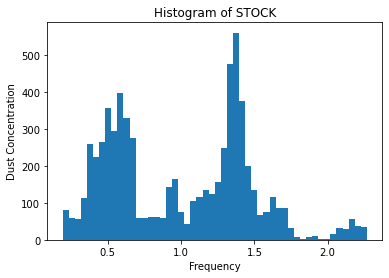

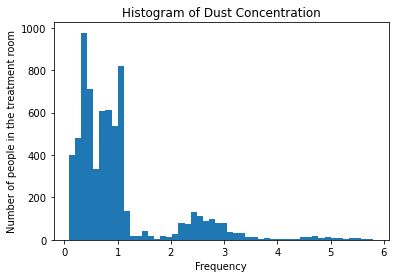

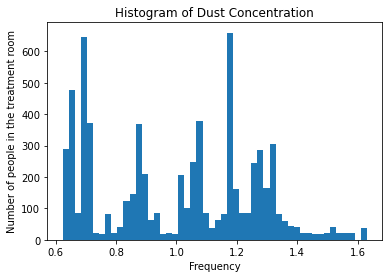

In [13]:
from matplotlib import pyplot as plt

fig1= plt.figure()
axes1 = fig1.add_subplot(1, 1, 1)
axes1.hist(ALL['주가'], bins = 50)
axes1.set_title('Histogram of STOCK')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Dust Concentration')

fig2= plt.figure()
axes2 = fig2.add_subplot(1, 1, 1)
axes2.hist(ALL['금리'], bins = 50)
axes2.set_title('Histogram of Dust Concentration')
axes2.set_xlabel('Frequency')
axes2.set_ylabel('Number of people in the treatment room')

fig3= plt.figure()
axes3 = fig3.add_subplot(1, 1, 1)
axes3.hist(ALL['주택가격'], bins = 50)
axes3.set_title('Histogram of Dust Concentration')
axes3.set_xlabel('Frequency')
axes3.set_ylabel('Number of people in the treatment room')

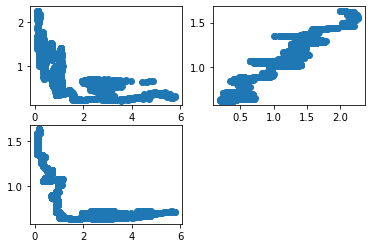

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
axes4 = fig.add_subplot(2, 2, 1)
axes5 = fig.add_subplot(2, 2, 2)
axes6 = fig.add_subplot(2, 2, 3)

axes4.plot(ALL['금리'], ALL['주가'],'o')
axes5.plot(ALL['주가'], ALL['주택가격'],'o')
axes6.plot(ALL['금리'], ALL['주택가격'],'o')

In [15]:
from sklearn.model_selection import train_test_split

X = ALL
ALL_train, ALL_test = train_test_split(X, test_size=0.2632, random_state=1)
print(len(ALL_train))
print(len(ALL_test))

4987
1782


[-1.27120397]


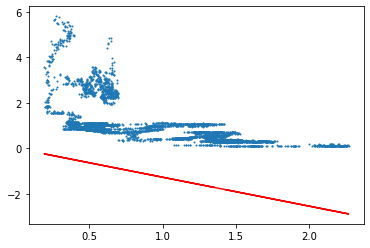

In [16]:
#Least Squares(Linear Regression)

import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

X = np.array(ALL_train['주가']).reshape(-1,1)
y = ALL_train['금리']
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_)

w = lr.coef_[0]

plt.scatter(X, y, s=1)
plt.plot(X, w*X, c='red')

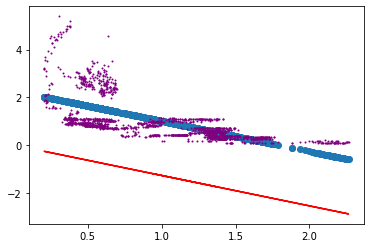

In [17]:
test_X = np.array(ALL_test['주가']).reshape(-1,1)
pred_y = lr.predict(test_X)

plt.scatter(test_X, pred_y)
plt.plot(test_X, w*test_X, c='red')

test_y = ALL_test['금리']

plt.scatter(test_X, test_y, c='purple', s=1)

0.4483404174527503 0.5337333727036089


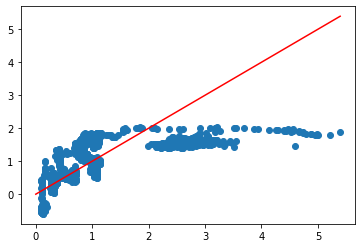

0.40491641139789103


In [18]:
#Model Evaluation Metrics / Loss-Regression

from sklearn.metrics import mean_squared_error
test_loss = mean_squared_error(test_y, pred_y)

train_y = lr.predict(X)
train_loss = mean_squared_error(y, train_y)

print(test_loss, train_loss)
plt.scatter(test_y, pred_y)
plt.plot([0,np.max(test_y)],[0,np.max(test_y)], color='red')
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(test_y, pred_y)
print(r2)

train loss;  0.46427358042175426
test loss;  0.38609768608178363
0.4875313765154078


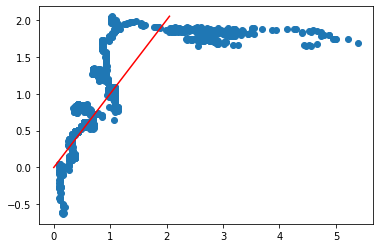

In [19]:
#모든 변수 이용
import numpy as np
from sklearn.linear_model import LinearRegression ######
from matplotlib import pyplot as plt

X = np.array(ALL_train.iloc[:,[2,3]])
#print(X)
y = ALL_train['금리'] # column 1
lr = LinearRegression()
lr.fit(X, y)
#print(lr.coef_)

train_y = lr.predict(X)
train_loss = mean_squared_error(y, train_y)
print('train loss; ', train_loss)


test_X = np.array(ALL_test.iloc[:,[2,3]])
pred_y = lr.predict(test_X)
test_y = ALL_test['금리'] # column 1

test_loss = mean_squared_error(test_y, pred_y)

print('test loss; ', test_loss)

plt.scatter(test_y, pred_y)
plt.plot([0,np.max(pred_y)],[0,np.max(pred_y)], color='red')

from sklearn.metrics import r2_score
r2 = r2_score(test_y, pred_y)
print(r2)

train loss;  0.4643361159573268
test loss;  0.38609768608178363
0.4875313765154078


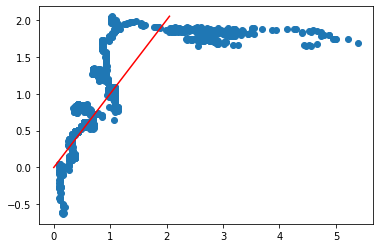

In [20]:
# Ridge regression

import numpy as np
from sklearn.linear_model import Ridge ##########
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = np.array(ALL_train.iloc[:,[2,3]])
y = ALL_train['금리'] # column 1
Rr = Ridge(alpha=1) # --> Ridge 로 변경, lamda 값은 기본 1.0 부터 조정
Rr.fit(X, y)
#print(Rr.coef_)

train_y = Rr.predict(X)
train_loss = mean_squared_error(y, train_y)
print('train loss; ', train_loss)


test_X = np.array(ALL_test.iloc[:,[2,3]])
pred_y = lr.predict(test_X)
test_y = ALL_test['금리'] # column 1

test_loss = mean_squared_error(test_y, pred_y)

print('test loss; ', test_loss)

plt.scatter(test_y, pred_y)
plt.plot([0,np.max(pred_y)],[0,np.max(pred_y)], color='red')

r2 = r2_score(test_y, pred_y)
print(r2)

In [21]:
import numpy as np
from sklearn.linear_model import Ridge #######
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = np.array(ALL_train.iloc[:,[2,3]])
y = ALL_train['금리'] # column 1
test_X = np.array(ALL_test.iloc[:,[2,3]])
test_y = ALL_test['금리'] # column 1

prev_best_r2 = 0.0
model_alpha = 1.0
loss = 0.0
for test_a in np.arange(0.999, 2, 0.0001):
  Rr = Ridge(alpha=test_a) # --> Ridge 로 변경, lamda 값은 기본 1.0 부터 조정
  Rr.fit(X, y)

  pred_y = Rr.predict(test_X)

  train_loss = mean_squared_error(test_y, pred_y)
  r2 = r2_score(test_y, pred_y)
  if r2 > prev_best_r2:
    prev_best_r2 = r2
    model_alpha = test_a
    loss = train_loss
print("new best/ alpha: ", model_alpha, "r2: ", prev_best_r2, "loss: ", loss)


new best/ alpha:  1.45379999999995 r2:  0.4876955068233979 loss:  0.38597402908264883


array([ 0.30075643, -3.05189139])

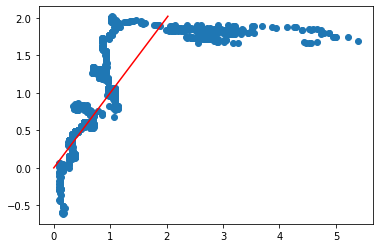

In [22]:
Rr = Ridge(alpha=1.4538) # --> Ridge 로 변경, lamda 값은 기본 1.0 부터 조정
Rr.fit(X, y)

pred_y = Rr.predict(test_X)
test_y = ALL_test['금리'] # column 


plt.scatter(test_y, pred_y)
plt.plot([0,np.max(pred_y)],[0,np.max(pred_y)], color='red')
Rr.coef_

In [23]:
#Lasso

from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)

import numpy as np
from sklearn.linear_model import Lasso #####
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = np.array(ALL_train.iloc[:,[2,3]])
y = ALL_train['금리'] # column 1
test_X = np.array(ALL_test.iloc[:,[2,3]])
test_y = ALL_test['금리'] # column 1

prev_best_r2 = 0.0
model_alpha = 1.0
loss = 0.0
for test_a in np.arange(0.0001, 0.001, 0.00001):
  LassoR = Lasso(alpha=test_a) # --> Ridge 로 변경, lamda 값은 기본 1.0 부터 조정
  LassoR.fit(X, y)

  pred_y = LassoR.predict(test_X)

  train_loss = mean_squared_error(test_y, pred_y)
  r2 = r2_score(test_y, pred_y)
  if r2 > prev_best_r2:
    prev_best_r2 = r2
    model_alpha = test_a
    loss = train_loss
print("new best/ alpha: ", model_alpha, "r2: ", prev_best_r2, "loss: ", loss)


new best/ alpha:  0.00041999999999999996 r2:  0.4876085504967653 loss:  0.38603954262818985


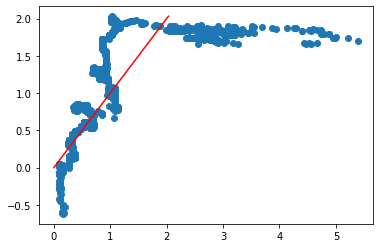

In [24]:
LassoR = Lasso(alpha=0.00042) # --> Lasso 로 변경, lamda 값은 기본 1.0 부터 조정
LassoR.fit(X, y)

pred_y = LassoR.predict(test_X)

plt.scatter(test_y, pred_y)
plt.plot([0,np.max(pred_y)],[0,np.max(pred_y)], color='red')

[0.98170226 0.01829774]
[[ 0.88440789  0.46671478]
 [-0.46671478  0.88440789]]
(1782, 2)


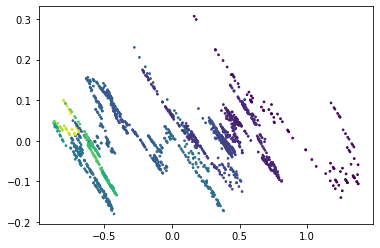

In [25]:
#principal component analysis(PCA)

import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components=2)
pca.fit(ALL_train.iloc[:,[2,3]])
print(pca.explained_variance_ratio_)
print(pca.components_)

pca_df = pca.transform(ALL_test.iloc[:,[2,3]])
print(pca_df.shape)

plt.scatter(pca_df[:, 0], pca_df[:, 1], c=np.log(ALL_test['금리'] + 1), s=3)

In [26]:
#Logistic Regression

X = np.array(ALL_train.iloc[:,[2,3]])
y = ALL_train['금리'] # column 1
test_X = np.array(ALL_test.iloc[:,[2,3]])
test_y = ALL_test['금리'] # column 1

median_room = np.median(y)
# 0 < median_room < 1

class_y = [1 if i > median_room else 0 for i in y]
print(class_y)

test_class_y = [1 if i > median_room else 0 for i in test_y]
print(test_class_y)

[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 

In [27]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, class_y)

predicted_y = clf.predict(test_X)
print(predicted_y)

predicted_prob_y = clf.predict_proba(test_X)
print(predicted_prob_y)

clf.score(test_X, test_class_y)
#Return the mean accuracy on the given test data and labels.

[1 0 1 ... 0 0 0]
[[0.20844722 0.79155278]
 [0.97090566 0.02909434]
 [0.47023319 0.52976681]
 ...
 [0.91149989 0.08850011]
 [0.96423727 0.03576273]
 [0.92657105 0.07342895]]


0.9040404040404041

In [28]:
#ROC/AUC curv 그려보기

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_class_y, predicted_y)
print(confusion_matrix)

[[848  54]
 [117 763]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(test_class_y, predicted_y))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       902
           1       0.93      0.87      0.90       880

    accuracy                           0.90      1782
   macro avg       0.91      0.90      0.90      1782
weighted avg       0.91      0.90      0.90      1782



0.903589246119734
[0.79155278 0.02909434 0.52976681 ... 0.08850011 0.03576273 0.07342895]


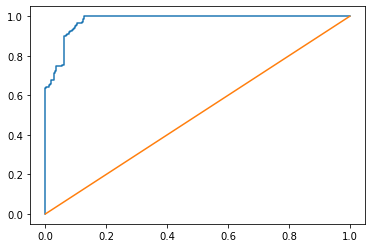

In [30]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_class_y, predicted_y)
fpr, tpr, thresholds = roc_curve(test_class_y, predicted_prob_y[:,1])
print(logit_roc_auc)
print(predicted_prob_y[:,1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

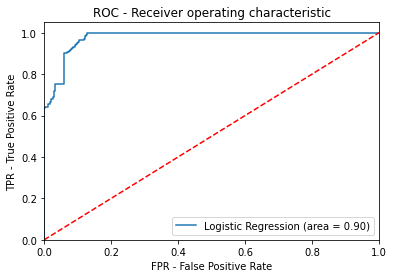

In [31]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_class_y, predicted_y)
fpr, tpr, thresholds = roc_curve(test_class_y, predicted_prob_y[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.title('ROC - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [32]:
#Support Vector Machine

from sklearn import svm

X = np.array(ALL_train.iloc[:,[2,3]])

clf = svm.SVC(kernel='poly')
clf.fit(X, class_y)
print(clf)

test_X = np.array(ALL_test.iloc[:,[2,3]])

predict_y = clf.predict(test_X)


SVC(kernel='poly')


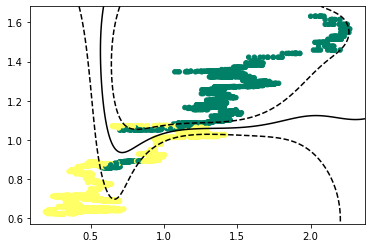

In [33]:
#시간 좀 걸림

from sklearn import svm
from matplotlib import pyplot as plt
import numpy as np


X = np.array(ALL_train.iloc[:,[2,3]])

clf = svm.SVC()
clf.fit(X, class_y)
#####

plt.scatter(X[:, 0], X[:, 1], c=class_y, s=20, cmap='summer')
#https://matplotlib.org/examples/color/colormaps_reference.html 에서 색 배합 확인 가능
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plot_x = np.linspace(xlim[0], xlim[1], 1000)
plot_y = np.linspace(ylim[0], ylim[1], 1000)
grid_Y, grid_X = np.meshgrid(plot_y, plot_x)
xy = np.vstack([grid_X.ravel(), grid_Y.ravel()]).T
P = clf.decision_function(xy).reshape(grid_X.shape)

# plot decision boundary and margins
ax.contour(grid_X, grid_Y, P, colors='black',
            levels=[-1, 0, 1], alpha=1,
            linestyles=['--', '-', '--'])

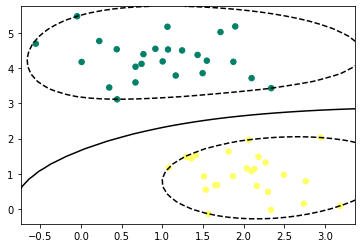

In [34]:
#SVM
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import svm

X, class_y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

clf = svm.SVC(kernel='rbf', C=1E10)
clf.fit(X, class_y)

plt.scatter(X[:, 0], X[:, 1], c=class_y, s=30, cmap='summer')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    # create grid to evaluate model
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
Y, X = np.meshgrid(y, x)
xy = np.vstack([X.ravel(), Y.ravel()]).T
P = clf.decision_function(xy).reshape(X.shape)

# plot decision boundary and margins
ax.contour(X, Y, P, colors='black',
            levels=[-1, 0, 1], alpha=1,
            linestyles=['--', '-', '--'])

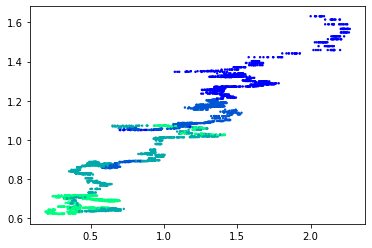

In [35]:
# Nearest Neighbor

import pandas
import numpy as np

X = np.array(ALL_train.iloc[:,[2,3]])
y = ALL_train['금리'] # column 1
test_X = np.array(ALL_test.iloc[:,[2,3]])
test_y = ALL_test['금리'] # column 1


from matplotlib import pyplot as plt

class_label = y
percent25 = np.percentile(class_label,25, axis=0)
percent50 = np.percentile(class_label,50, axis=0)
percent75 = np.percentile(class_label,75, axis=0)

class_label = [0 if j < percent25 else 1 if j < percent50 else 2 if j < percent75 else 3 for j in class_label]

plt.scatter(X[:,0], X[:,1],  c=class_label, s=2, cmap='winter')

In [36]:
test_class_label = test_y
test_class_label = [0 if j < percent25 else 1 if j < percent50 else 2 \
               if j < percent75 else 3 for j in test_class_label]

In [37]:
from sklearn import neighbors
weights = 'distance'
n_neighbors = 10
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X, class_label)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [38]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(X, class_label)

NearestCentroid()

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       425
           1       0.67      0.78      0.72       470
           2       0.70      0.34      0.45       475
           3       0.63      0.91      0.74       412

    accuracy                           0.71      1782
   macro avg       0.72      0.73      0.70      1782
weighted avg       0.72      0.71      0.70      1782



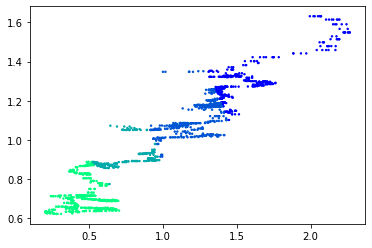

In [39]:
from sklearn.metrics import classification_report

predict_y = clf.predict(test_X)
#print(predict_y)

plt.scatter(test_X[:,0], test_X[:,1],  c=predict_y, s=2, cmap='winter')
print(classification_report(test_class_label, predict_y))

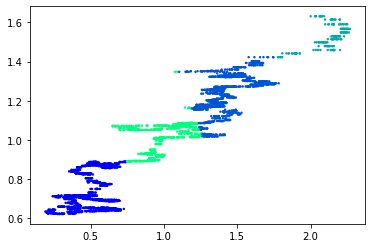

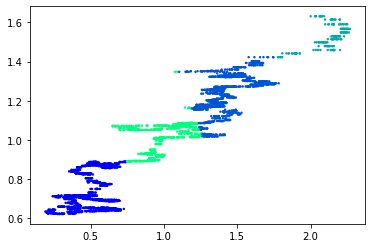

In [40]:
from sklearn.cluster import KMeans
import numpy as np

y = ALL_train.iloc[:,[2,3]]

kmeans = KMeans(n_clusters=4, random_state=0).fit(y)
train_cluster = kmeans.labels_
plt.scatter(y.iloc[:,0], y.iloc[:,1],  c=train_cluster, s=2, cmap='winter')
plt.show()
plt.scatter(X[:,0], X[:,1],  c=train_cluster, s=2, cmap='winter')
plt.show()


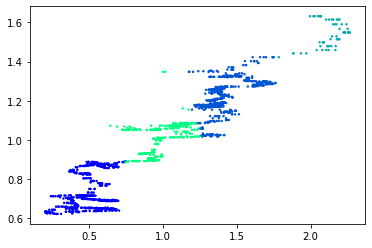

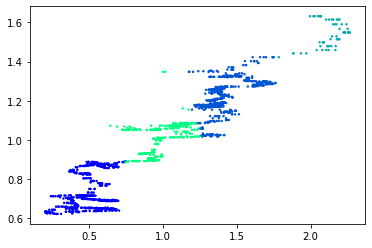

In [41]:
test_y = ALL_test.iloc[:,[2,3]]
test_cluster = (kmeans.predict(test_y))
plt.scatter(test_y.iloc[:,0], test_y.iloc[:,1],  c=test_cluster, s=2, cmap='winter')
plt.show()
plt.scatter(test_X[:,0], test_X[:,1],  c=test_cluster, s=2, cmap='winter')
plt.show()

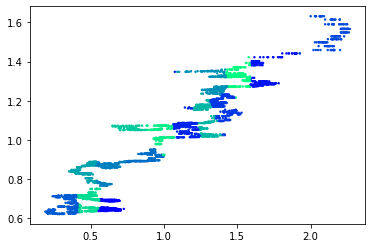

In [42]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=15, random_state=0).fit(X)
train_cluster = kmeans.labels_

plt.scatter(X[:,0], X[:,1],  c=train_cluster, s=2, cmap='winter')
plt.show()


In [43]:
# Decision Trees

# pip install graphviz
# 환경변수 C:\Users\user\anaconda3\Lib\site-packages\graphviz

#환경변수 설정 했는데도 실행이 안되었음...
'''
from sklearn import tree

X = [[0, 0], [1, 1], [0, 1], [1, 0]]
Y = [0, 1, 1, 0]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
#tree.plot_tree(clf)

print(clf.predict([[2., 2.]]))
print(clf.predict([[2., 0.]]))

print(clf.predict_proba([[2., 2.]]))
print(clf.predict_proba([[2., 0.]]))

#array([[0., 1.]])
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      filled=True, rounded=True,  
                      special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("c_house") 
graph
'''


'\nfrom sklearn import tree\n\nX = [[0, 0], [1, 1], [0, 1], [1, 0]]\nY = [0, 1, 1, 0]\nclf = tree.DecisionTreeClassifier()\nclf = clf.fit(X, Y)\n#tree.plot_tree(clf)\n\nprint(clf.predict([[2., 2.]]))\nprint(clf.predict([[2., 0.]]))\n\nprint(clf.predict_proba([[2., 2.]]))\nprint(clf.predict_proba([[2., 0.]]))\n\n#array([[0., 1.]])\nimport graphviz \ndot_data = tree.export_graphviz(clf, out_file=None, \n                      filled=True, rounded=True,  \n                      special_characters=True) \ngraph = graphviz.Source(dot_data) \ngraph.render("c_house") \ngraph\n'

In [44]:
import pandas
import numpy as np

X = np.array(ALL_train.iloc[:,[2,3]])
y = ALL_train['금리'] # column 1
test_X = np.array(ALL_test.iloc[:,[2,3]])
test_y = ALL_test['금리'] # column 1

class_label = y
percent25 = np.percentile(class_label,25, axis=0)
percent50 = np.percentile(class_label,50, axis=0)
percent75 = np.percentile(class_label,75, axis=0)

class_label = [0 if j < percent25 else 1 if j < percent50 else 2 \
               if j < percent75 else 3 for j in class_label]

test_class_label = test_y
test_class_label = [0 if j < percent25 else 1 if j < percent50 else 2 \
               if j < percent75 else 3 for j in test_class_label]

In [45]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X, class_label)
#tree.plot_tree(clf) 


import graphviz 
#dot_data = tree.export_graphviz(clf, out_file=None, 
#                      filled=True, rounded=True,  
#                      special_characters=True) 
#graph = graphviz.Source(dot_data) 
#graph.render("c_house") 
#graph


In [46]:
from sklearn.metrics import classification_report

predict_y = clf.predict(test_X)
#print(predict_y)

print(classification_report(test_class_label, predict_y))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       425
           1       0.87      0.98      0.92       470
           2       0.98      0.77      0.87       475
           3       0.87      0.99      0.92       412

    accuracy                           0.92      1782
   macro avg       0.93      0.93      0.92      1782
weighted avg       0.93      0.92      0.92      1782



In [47]:
# Forests of randomized trees (RF)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, class_label)

In [48]:
from sklearn.metrics import classification_report

predict_y = clf.predict(test_X)
#print(predict_y)

print(classification_report(test_class_label, predict_y))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       425
           1       0.97      0.97      0.97       470
           2       0.96      0.95      0.96       475
           3       0.96      0.97      0.96       412

    accuracy                           0.97      1782
   macro avg       0.97      0.97      0.97      1782
weighted avg       0.97      0.97      0.97      1782



In [49]:
# Neural network models

import pandas
import numpy as np

X = np.array(ALL_train.iloc[:,[2,3]])
y = ALL_train['금리'] # column 1
test_X = np.array(ALL_test.iloc[:,[2,3]])
test_y = ALL_test['금리'] # column 1


class_label = y
percent25 = np.percentile(class_label,25, axis=0)
percent50 = np.percentile(class_label,50, axis=0)
percent75 = np.percentile(class_label,75, axis=0)

class_label = [0 if j < percent75 else 1 for j in class_label]

test_class_label = test_y
test_class_label = [0 if j < percent75 else 1 for j in test_class_label]

In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf = MLPClassifier( solver='adam', max_iter=1000,  alpha=1e-5,
                     hidden_layer_sizes=(5, 5, 5, 5), random_state=1)

clf.fit(X, class_label)
print(clf)

predict_y = clf.predict(test_X)
print(classification_report(test_class_label, predict_y))

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5, 5, 5), max_iter=1000,
              random_state=1)
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1370
           1       0.75      0.87      0.81       412

    accuracy                           0.91      1782
   macro avg       0.86      0.89      0.87      1782
weighted avg       0.91      0.91      0.91      1782



In [51]:
# pip install torch

# AssertionError: Torch not compiled with CUDA enabled 
# conda install -c pytorch torchvision cudatoolkit=10.1 pytorch
'''
import torch

model = torch.nn.Sequential(
torch.nn.Linear(8,8),
torch.nn.Linear(8,8),
torch.nn.Linear(8,1),
)

model.cuda(0)
out = model(torch.Tensor(X))
print(out)
# class_label
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
#
'''

'\nimport torch\n\nmodel = torch.nn.Sequential(\ntorch.nn.Linear(8,8),\ntorch.nn.Linear(8,8),\ntorch.nn.Linear(8,1),\n)\n\nmodel.cuda(0)\nout = model(torch.Tensor(X))\nprint(out)\n# class_label\noptimizer = torch.optim.Adam(model.parameters(), lr=0.0001)\n#\n'